# Loan Default Detection

In [1]:
# load packages
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data and explore the dataset
data = pd.read_csv("~/Desktop/L/Anomaly Detection/session 2/HW2/XYZloan_default_selected_vars.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


## 1 Feature Engineering

- Lead
    - Before test the model, it is necessary to explore and process the original dataset, including eliminate some variables, transform the variables' form to a more readable one, group variables, deal with the missing values, etc. In a word, we need to finsih the feature engineering part before deploy the model to the dataset.
    - Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. which also is the fundamental to the application of machine learning.
    - Binning is a categorization process to transform a continuous variable into a small set of groups or bins, which is also a good technique if the dataset has large number of missing values. 
    - WOE is a quantitative method for combining evidence in support of a statistical hypothesis. WOE is widely used in credit scoring to separate good accounts and bad accounts. It compares the proportion of good accounts to bad accounts at each attribute level, and measures the strength of the attributes of an independent variable in separating good and bad accounts.
    - The process of identifying only the most relevant features is called “feature selection.” Random Forests are often used for feature selection in a data science workflow. The reason is because the tree-based strategies used by random forests naturally ranks by how well they improve the purity of the node
- Anslysis
    - Check the varaible types and change the date formort of variable AP005 (Drop hour and minute)
    - Check the missing values
    - Use weight of evidence (WOE) and information value (IV) to perform variable transformation and selction. (After transfer the variable drop variable which have IV < 0.01)
    - Use random forest to select important variables
- Python code: Attached below
sources:(https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/)
(https://medium.com/@sundarstyles89/weight-of-evidence-and-information-value-using-python-6f05072e83eb)



In [3]:
# examine types of the variables
var = pd.DataFrame(data.dtypes)
var.head()

,0
Unnamed: 0,int64
Unnamed: 0.1,int64
id,int64
loan_default,int64
AP001,int64


The data types of AP005, AP006, and MB007 are object.

In [4]:
# deal with the variable AP005, drop hour and minute
data['AP005'] = pd.to_datetime(data['AP005']).dt.date
data['AP005'].head()

0    2017-07-06
1    2017-04-06
2    2017-07-01
3    2017-07-07
4    2017-07-06
Name: AP005, dtype: object

In [5]:
# Check the missing values
def missing_values_table(df):
    """
    check missing data
    """
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns['dtype'] = df.dtypes

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
    "There are " + str(mis_val_table_ren_columns.shape[0]) +
    " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

miss_stat = missing_values_table(data)

miss_stat

Your selected dataframe has 89 columns.
There are 58 columns that have missing values.


,Missing Values,% of Total Values,dtype
TD062,79999,100.0,float64
TD055,79999,100.0,float64
TD048,79999,100.0,float64
TD044,79997,100.0,float64
TD051,79995,100.0,float64
TD061,79990,100.0,float64
TD054,79988,100.0,float64
TD022,19598,24.5,float64
TD023,7663,9.6,float64
TD024,3694,4.6,float64


### 1.1WOE Binning & VI (Variable Selection)

In [8]:
from scorecardpy import woebin
cat_data = data.select_dtypes('object')
cat_data['loan_default'] = data['loan_default']
cat_data.nunique().sort_values(ascending=False)
cat_combine_bin = woebin(cat_data, y="loan_default", stop_limit=0.01)
cat_combine_bin

[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
MB007
>>> Continue the binning process?
1: yes 
2: no
Selection: 1


{'AP006':   variable       bin  count  count_distr   good   bad   badprob       woe  \
 0    AP006       ios  17159     0.214487  14049  3110  0.181246 -0.081143   
 1    AP006  h5%,%api  45701     0.571263  37133  8568  0.187479 -0.039686   
 2    AP006   android  17140     0.214250  13330  3810  0.222287  0.174398   
 
      bin_iv  total_iv    breaks  is_special_values  
 0  0.001377  0.009132       ios              False  
 1  0.000889  0.009132  h5%,%api              False  
 2  0.006866  0.009132   android              False  ,
 'MB007':   variable                                                bin  count  \
 0    MB007  HRT%,%VERIZON%,%TINAI%,%SUGAR%,%SKYHON%,%SGMSG...   4599   
 1    MB007                            360%,%IPHONE7%,%IPHONE8  11638   
 2    MB007                                                WEB  43850   
 3    MB007                          HUAWEI%,%Noinfo%,%SAMSUNG   6159   
 4    MB007  ASUS%,%COOLPAD%,%MEIZU%,%LEECO%,%XIAOMI%,%IPHO...   4958   
 5    MB007  

In [9]:
num_data = data.select_dtypes(['int64', 'float64'])
num_combine_bin = woebin(num_data, y="loan_default", stop_limit=0.01)


[INFO] creating woe binning ...
Binning on 80000 rows and 85 columns in 00:01:07


In [10]:
from scorecardpy import woebin_ply
num_data_woe = woebin_ply(num_data, num_combine_bin)
cat_data_woe = woebin_ply(cat_data, cat_combine_bin)

# merge num_data_woe and cat_data_woe as a new dataset
loan_woe = pd.merge(left=num_data_woe, right=cat_data_woe.drop(columns='loan_default'),
                     left_index=True, right_index=True)
loan_woe.head()

[INFO] converting into woe values ...
Woe transformating on 80000 rows and 84 columns in 00:00:13
[INFO] converting into woe values ...


,loan_default,CR012,CD160_woe,TD014_woe,CD169_woe,TD002_woe,TD025_woe,PA023_woe,CD164_woe,PA028_woe,...,TD024_woe,CR004_woe,CD172_woe,CD118_woe,CD170_woe,CR005_woe,CD106_woe,AP005,AP006_woe,MB007_woe
0,1,0,-0.010796,-0.091231,0.029291,-0.029130,0.019867,-0.127977,-0.023103,-0.14506,...,0.095285,-0.036844,0.046426,0.102542,0.051545,-0.072842,-0.112572,2017-07-06,-0.081143,-0.074983
1,0,0,-0.168957,-0.091231,-0.088466,-0.068085,0.019867,-0.127977,-0.173470,-0.14506,...,-0.173663,0.100313,-0.094557,-0.037270,-0.086523,-0.072842,-0.199898,2017-04-06,-0.039686,-0.039832
2,0,0,-0.168957,-0.263447,-0.088466,-0.029130,0.019867,-0.127977,-0.099609,-0.14506,...,-0.173663,-0.036844,-0.094557,0.168076,-0.086523,0.173070,-0.199898,2017-07-01,-0.039686,-0.039832
3,0,0,-0.168957,-0.263447,-0.088466,-0.068085,0.019867,-0.127977,-0.173470,-0.14506,...,-0.632111,-0.036844,-0.094557,-0.037270,-0.086523,-0.072842,-0.199898,2017-07-07,0.174398,0.320884
4,0,0,-0.168957,-0.263447,-0.088466,-0.068085,0.019867,-0.127977,-0.173470,-0.14506,...,-0.173663,0.100313,-0.094557,-0.037270,-0.086523,0.173070,-0.199898,2017-07-06,-0.039686,-0.039832


In [11]:
# check the missing values after WOE binning
missing_values_table(loan_woe)

Your selected dataframe has 89 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,dtype
TD055_woe,1,0.0,float64
TD062_woe,1,0.0,float64
TD048_woe,1,0.0,float64


In [12]:
# drop features with IV < 0.01
del_by_iv = []
iv_list = {}
all_combine_bin = dict(cat_combine_bin, **num_combine_bin)

for feature, df in all_combine_bin.items():
    iv = df['total_iv'].iloc[0]
    iv_list[feature + '_woe'] = iv
    if iv < 0.01:
        del_by_iv.append(feature + '_woe')
loan_woe.drop(columns=del_by_iv, inplace=True)

In [13]:
loan_woe.describe()

,loan_default,CR012,CD160_woe,TD014_woe,TD002_woe,TD025_woe,PA023_woe,CD164_woe,PA028_woe,CR015_woe,...,CD123_woe,TD006_woe,TD028_woe,TD010_woe,TD024_woe,CR004_woe,CD118_woe,CR005_woe,CD106_woe,MB007_woe
count,80000.000000,80000.0,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.193600,0.0,-0.004363,-0.025711,-0.004261,-0.005743,-0.011045,-0.004778,-0.012951,-0.003625,...,-0.007659,-0.012632,-0.004942,-0.020682,-0.019329,-0.003844,-0.005721,-0.003332,-0.008722,-0.004691
std,0.395121,0.0,0.119300,0.290109,0.117707,0.141140,0.189521,0.124836,0.205255,0.108595,...,0.159044,0.203084,0.132059,0.259962,0.252458,0.112153,0.137123,0.104156,0.168735,0.123594
min,0.000000,0.0,-0.168957,-0.367246,-0.068085,-0.783580,-0.127977,-0.173470,-0.145060,-0.062665,...,-0.405078,-0.169136,-0.918912,-0.291719,-0.632111,-0.175340,-0.306369,-0.072842,-0.199898,-0.183435
25%,0.000000,0.0,-0.070119,-0.263447,-0.068085,0.019867,-0.127977,-0.099609,-0.145060,-0.062665,...,-0.099064,-0.169136,0.014139,-0.203039,-0.173663,-0.036844,-0.103237,-0.072842,-0.199898,-0.039832
50%,0.000000,0.0,-0.010796,-0.091231,-0.068085,0.019867,-0.127977,-0.023103,-0.145060,-0.062665,...,-0.008106,-0.114149,0.014139,-0.014920,-0.063895,-0.036844,-0.010574,-0.072842,-0.017168,-0.039832
75%,0.000000,0.0,0.100051,0.262056,-0.029130,0.019867,0.200353,0.085220,0.142200,-0.062665,...,0.113208,0.086782,0.014139,0.180837,0.184937,0.100313,0.102542,0.091785,0.123695,-0.039832
max,1.000000,0.0,0.324671,0.619566,0.278706,0.019867,0.324671,0.324671,0.358166,0.217716,...,0.324671,0.541496,0.014139,0.547155,0.555390,0.100313,0.324671,0.173070,0.366313,0.320884


### 1.2 Random Forest (Feature Selection)

In [16]:
from sklearn.model_selection import train_test_split
train1, test1 = train_test_split(
     loan_woe, test_size=0.40, random_state=42)

In [20]:
# start h2o
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.1" 2018-10-16 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.1+13-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.1+13-LTS, mixed mode)
  Starting server from /Users/gaealee/opt/anaconda3/envs/working/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/hw/q8mxlsgj3453glj5g4wm2bsc0000gn/T/tmpjoh2c33d
  JVM stdout: /var/folders/hw/q8mxlsgj3453glj5g4wm2bsc0000gn/T/tmpjoh2c33d/h2o_gaealee_started_from_python.out
  JVM stderr: /var/folders/hw/q8mxlsgj3453glj5g4wm2bsc0000gn/T/tmpjoh2c33d/h2o_gaealee_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_gaealee_bxx03t
H2O cluster total nodes:,1
H2O cluster free memory:,2 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [21]:
target='loan_default'

In [22]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [64]:
predictors = list(loan_woe.columns)
predictors.remove('loan_default')
predictors

['CR012',
 'CD160_woe',
 'TD014_woe',
 'TD002_woe',
 'TD025_woe',
 'PA023_woe',
 'CD164_woe',
 'PA028_woe',
 'CR015_woe',
 'AP003_woe',
 'TD029_woe',
 'CD113_woe',
 'AP004_woe',
 'CD100_woe',
 'TD005_woe',
 'CD121_woe',
 'CD120_woe',
 'PA029_woe',
 'TD023_woe',
 'AP007_woe',
 'CD107_woe',
 'TD022_woe',
 'TD027_woe',
 'CD101_woe',
 'CD114_woe',
 'CR017_woe',
 'CD162_woe',
 'TD013_woe',
 'TD001_woe',
 'PA022_woe',
 'CR019_woe',
 'CD115_woe',
 'PA031_woe',
 'TD015_woe',
 'MB005_woe',
 'TD009_woe',
 'TD026_woe',
 'PA030_woe',
 'CR018_woe',
 'CD108_woe',
 'CD117_woe',
 'CD123_woe',
 'TD006_woe',
 'TD028_woe',
 'TD010_woe',
 'TD024_woe',
 'CR004_woe',
 'CD118_woe',
 'CR005_woe',
 'CD106_woe',
 'AP005',
 'MB007_woe']

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


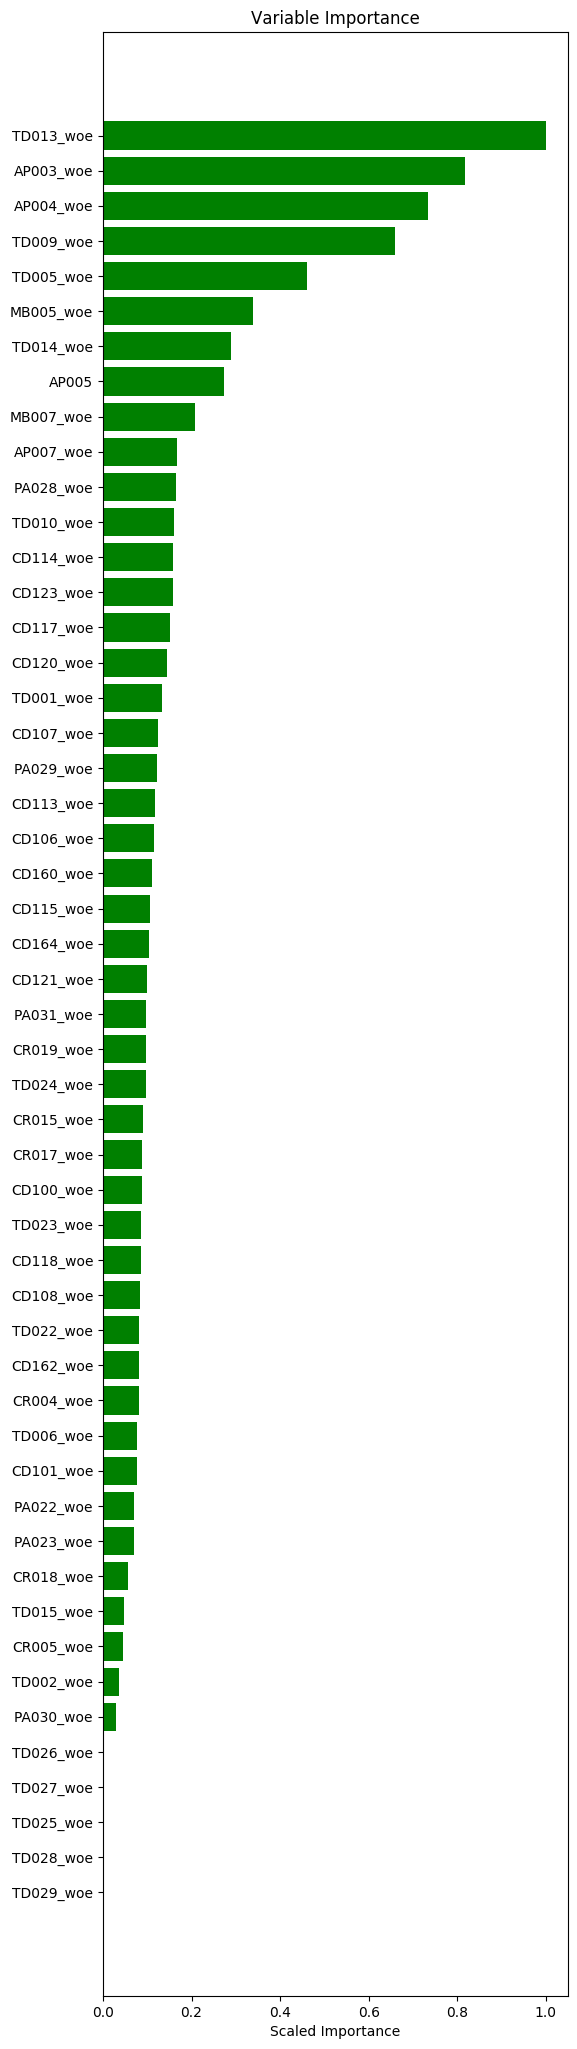

In [25]:
train_w = h2o.H2OFrame(train1)
test_w = h2o.H2OFrame(test1)
rf_v2 = H2ORandomForestEstimator(
        model_id = 'rf_v2',
        ntrees = 800,
        max_depth =20,
        min_rows=70,
        seed=1234)
rf_v2.train(predictors,target,training_frame=train_w)

# create the function of variable importance
def VarImp(model_name):
    
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    
    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (6,len(variables)/2))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title('Variable Importance')
    plt.show()

# get the variable importance with hyperparameters in the example    
VarImp(rf_v2)

In [65]:
predictors.remove('TD026_woe')
predictors.remove('TD027_woe')
predictors.remove('TD025_woe')
predictors.remove('TD028_woe')
predictors.remove('TD029_woe')
predictors

['CR012',
 'CD160_woe',
 'TD014_woe',
 'TD002_woe',
 'PA023_woe',
 'CD164_woe',
 'PA028_woe',
 'CR015_woe',
 'AP003_woe',
 'CD113_woe',
 'AP004_woe',
 'CD100_woe',
 'TD005_woe',
 'CD121_woe',
 'CD120_woe',
 'PA029_woe',
 'TD023_woe',
 'AP007_woe',
 'CD107_woe',
 'TD022_woe',
 'CD101_woe',
 'CD114_woe',
 'CR017_woe',
 'CD162_woe',
 'TD013_woe',
 'TD001_woe',
 'PA022_woe',
 'CR019_woe',
 'CD115_woe',
 'PA031_woe',
 'TD015_woe',
 'MB005_woe',
 'TD009_woe',
 'PA030_woe',
 'CR018_woe',
 'CD108_woe',
 'CD117_woe',
 'CD123_woe',
 'TD006_woe',
 'TD010_woe',
 'TD024_woe',
 'CR004_woe',
 'CD118_woe',
 'CR005_woe',
 'CD106_woe',
 'AP005',
 'MB007_woe']

- Conclusion
    - Using WOE binning techniques combined with information value, we remove 37 features and the keep 52 features. Meanwhile, we also solve the problem of high volumes of missing values.
    - Using random forest, we can select variables by examining the value of important variables. The total number of features will keep in the following analysis is 46.

### 2 GLM

- Lead:
    - Generalized Linear Models (GLM) estimate regression models for outcomes following exponential distributions. In addition to the Gaussian (i.e. normal) distribution, these include Poisson, binomial, and gamma distributions. 
    - Some important parameters to define a GLM model includes:
        - Family: Specify the model type.(If the family is gaussian, the response must be numeric (Real or Int); If the family is binomial, the response must be categorical 2 levels/classes or binary (Enum or Int);If the family is multinomial, the response can be categorical with more than two levels/classes (Enum), etc.
        - Alpha: Specify the regularization distribution between L1 and L2.
        - Lambda: Specify the regularization strength.
    - Unlike algorithms such as random forest, when we use GLM, we need to solve the problem of missing values.
    - To get the optimal hyperparameter, we can use grid(hyperparameter) search in python. There are two approaches, including grid search and random grid search.
- Analysis
    - Get a small sample data and split it into train and test
    - Build the GLM model with sample data: Specifically, set family as "binomial" since the response is categorical 2 levels (default or not default)
    - Use sample test data to predict and then generate the gains table, AUC & ROC curve, and get the coefficients table
    - Use grid search to get the optimal hyper-parameters and build the new model with the best parameters
    - Generate the gains table, ROC and AUC curve, and coefficients table
- Python code: Attached below

### 2.1 sample dataset

In [33]:
# split the sample dataset
train_smpl = train1.sample(frac=0.1, random_state=1)
test_smpl = test1.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [34]:
# build the GLM model with the sample data
glm_v1 = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0.05) #, compute_p_values = True)
glm_v1.train(predictors,target,training_frame=train_hex)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [35]:
glm_v1.predict(test_hex)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.796794,0.203206
1,0.801006,0.198994
0,0.831233,0.168767
0,0.835017,0.164983
0,0.836234,0.163766
1,0.779149,0.220851
0,0.825589,0.174411
1,0.770998,0.229002
0,0.828407,0.171593
0,0.857783,0.142217


In [36]:
glm_v1.predict(test_hex)['p1']

glm prediction progress: |████████████████████████████████████████████████| 100%


p1
0.203206
0.198994
0.168767
0.164983
0.163766
0.220851
0.174411
0.229002
0.171593
0.142217


In [37]:
predictions = glm_v1.predict(test_hex)['p1']
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

glm prediction progress: |████████████████████████████████████████████████| 100%


,loan_default,p1
0,0,0.203206
1,0,0.198994
2,0,0.168767
3,0,0.164983
4,0,0.163766


In [38]:
# create function of gains table
def createGains(model):
    predictions = model.predict(test_hex)['p1']
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='p1',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

# create gains table
createGains(glm_v1)

glm prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,104,216,320,104,216,0.17,0.08,60.0,1.73,9.0,32.50
1,320,84,236,640,188,452,0.31,0.17,120.0,1.57,14.0,29.38
2,320,83,237,960,271,689,0.45,0.26,180.0,1.51,19.0,28.23
3,320,68,252,1280,339,941,0.56,0.36,240.0,1.41,20.0,26.48
4,320,52,268,1600,391,1209,0.65,0.46,300.0,1.30,19.0,24.44
5,320,53,267,1920,444,1476,0.74,0.57,360.0,1.23,17.0,23.12
6,320,46,274,2240,490,1750,0.82,0.67,420.0,1.17,15.0,21.88
7,320,47,273,2560,537,2023,0.90,0.78,480.0,1.12,12.0,20.98
8,320,33,287,2880,570,2310,0.95,0.89,540.0,1.06,6.0,19.79


In [39]:
# create the function of ROC and AUC curve
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df)['p1'].as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

glm prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



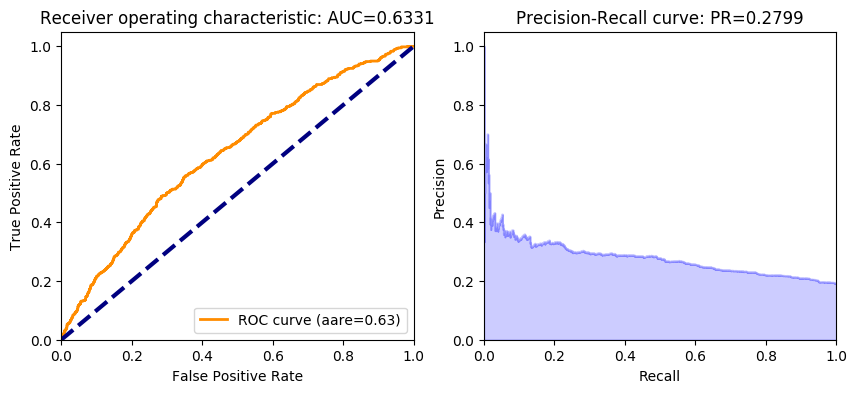

In [40]:
# plot the roc and auc cruve for the example 
ROC_AUC(glm_v1,test_hex,'loan_default')

In [41]:
# Print the Coefficients table
coefs = glm_v1._model_json['output']['coefficients_table'].as_data_frame()
coefs = pd.DataFrame(coefs)
coefs.sort_values(by='standardized_coefficients',ascending=False)

,names,coefficients,standardized_coefficients
24,TD013_woe,0.315635,0.116059
10,AP004_woe,0.213303,0.073886
12,TD005_woe,0.200270,0.063532
2,TD014_woe,0.118717,0.033517
8,AP003_woe,0.119362,0.028519
25,TD001_woe,0.066088,0.014334
21,CD114_woe,0.065613,0.011886
31,MB005_woe,0.016815,0.003018
32,TD009_woe,0.003135,0.001091
23,CD162_woe,0.000000,0.000000


- Conclusion
    - The feature engineering process is successful since the result of sample data is quite good and it can be applied to the whole dataset after grid search to get the optimal parameters.

### 2.2 Grid(hyperparameter) search

In [42]:
from h2o.grid.grid_search import H2OGridSearch
estimator = H2OGeneralizedLinearEstimator(family='binomial'
    )

random_params = {'alpha': [0.0001, 0.001, 0.01,0.05, 0.3,0.5], 
                 'lambda': [0.1,1e-2,1e-3,1e-4, 1e-5,1e-6,1e-7,1e-8]}

criteria = {'strategy': "RandomDiscrete"}


grid_search = H2OGridSearch(model = estimator, 
                            hyper_params = random_params,
                            search_criteria = criteria)

grid_search.train(predictors,target,training_frame=train_hex)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [43]:
sorted_grid = grid_search.get_grid(sort_by='mse',decreasing=False)
sorted_grid

         alpha    lambda  \
0        [0.3]  [1.0E-5]   
1        [0.5]  [1.0E-5]   
2        [0.3]  [1.0E-4]   
3        [0.5]  [1.0E-6]   
4       [0.05]  [1.0E-4]   
5       [0.01]  [1.0E-5]   
6       [0.05]  [1.0E-5]   
7        [0.5]  [1.0E-7]   
8       [0.05]  [1.0E-6]   
9        [0.3]  [1.0E-6]   
10       [0.3]  [1.0E-7]   
11      [0.01]  [1.0E-6]   
12       [0.5]  [1.0E-8]   
13      [0.05]  [1.0E-7]   
14       [0.3]  [1.0E-8]   
15      [0.01]  [1.0E-7]   
16      [0.05]  [1.0E-8]   
17      [0.01]  [1.0E-8]   
18     [0.001]  [1.0E-8]   
19    [1.0E-4]  [1.0E-8]   
20     [0.001]  [1.0E-7]   
21    [1.0E-4]  [1.0E-7]   
22     [0.001]  [1.0E-6]   
23    [1.0E-4]  [1.0E-6]   
24     [0.001]  [1.0E-5]   
25    [1.0E-4]  [1.0E-5]   
26      [0.01]  [1.0E-4]   
27     [0.001]  [1.0E-4]   
28    [1.0E-4]  [1.0E-4]   
29       [0.5]  [1.0E-4]   
30    [1.0E-4]   [0.001]   
31     [0.001]   [0.001]   
32      [0.01]   [0.001]   
33      [0.05]   [0.001]   
34       [0.3]   [0.

- Conclusion
    - Using the grid search, we get the optimal alpha is 0.3 and lambda is 1.0e-5

### 2.3 Whole dataset

In [44]:
# transform the train and test data to h2o form
train_w = h2o.H2OFrame(train1)
test_w = h2o.H2OFrame(test1)
# build the glm model with the whole data
glm_v2 = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 1e-5,alpha = 0.3 ) #, compute_p_values = True)
glm_v2.train(predictors,target,training_frame=train_w)

glm_v2.predict(test_w)

glm_v2.predict(test_w)['p1']

predictions = glm_v2.predict(test_w)['p1']
test_scores = test_w['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%


,loan_default,p1
0,0,0.136685
1,0,0.228801
2,0,0.069680
3,1,0.259418
4,0,0.499997


In [45]:
# create the gains table
createGains(glm_v2)

glm prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,133,187,320,133,187,0.22,0.07,60.0,2.22,15.0,41.56
1,320,89,231,640,222,418,0.37,0.16,120.0,1.85,21.0,34.69
2,320,76,244,960,298,662,0.50,0.25,180.0,1.66,25.0,31.04
3,320,62,258,1280,360,920,0.60,0.35,240.0,1.50,25.0,28.12
4,320,66,254,1600,426,1174,0.71,0.45,300.0,1.42,26.0,26.62
5,320,55,265,1920,481,1439,0.80,0.55,360.0,1.34,25.0,25.05
6,320,43,277,2240,524,1716,0.87,0.66,420.0,1.25,21.0,23.39
7,320,38,282,2560,562,1998,0.94,0.77,480.0,1.17,17.0,21.95
8,320,26,294,2880,588,2292,0.98,0.88,540.0,1.09,10.0,20.42


glm prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



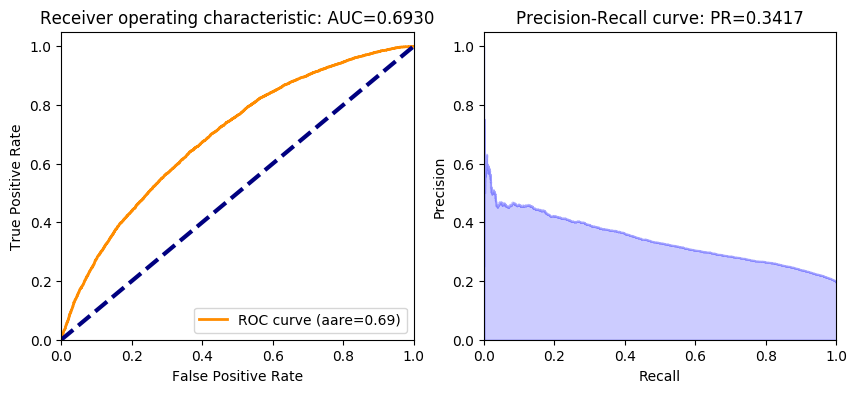

In [46]:
# generate the ROC and AUC curve
ROC_AUC(glm_v2,test_w,'loan_default')

In [67]:
# Print the Coefficients table
coefs2 = glm_v2._model_json['output']['coefficients_table'].as_data_frame()
coefs2 = pd.DataFrame(coefs2)
coefs2.sort_values(by='standardized_coefficients',ascending=False)

,names,coefficients,standardized_coefficients
10,AP004_woe,1.087389e+00,0.383013
8,AP003_woe,1.346197e+00,0.326622
24,TD013_woe,5.732397e-01,0.214340
12,TD005_woe,4.953070e-01,0.158325
31,MB005_woe,8.259010e-01,0.147619
36,CD117_woe,8.428521e-01,0.130557
46,MB007_woe,9.751681e-01,0.120485
17,AP007_woe,1.018767e+00,0.111528
2,TD014_woe,3.078161e-01,0.089202
21,CD114_woe,4.881649e-01,0.087221


- Conclusion
    - As the result shown above, the gird search method will work and I choose alpha = 0.3, lambda_ = 1e-5. We can see the final results of gains table and ROC&AUC are better than the previous one. Specifically, the largest lift is 2.22 and the value of AUC reaches to 0.693, which means the glm model have a good prediction ability.
    - To examine the coefficient of the GLM model, we can get the variables that have large impact on the loan default. As we can see, the important variable will be AP004, AP003, TD013, TD005, MB005, CD117, MB007, and AP007. And since 1 means will default, these varaible will increase the likelihood of loan default. When we offer loans, it is important to get more information about these variables. On the other hand, variable TD023, AP005, CD118, TD022, CD106, PA022 will decrease the load default probability.

### 3 AutoML

- Lead
    - H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit. Stacked Ensembles – one based on all previously trained models, another one on the best model of each family – will be automatically trained on collections of individual models to produce highly predictive ensemble models which, in most cases, will be the top performing models in the AutoML Leaderboard.
    - Some important parameters to define AutoML will be:
        - max_runtime_secs: This argument controls how long the AutoML will run at the most, before training the final Stacked Ensemble models. Defaults to 3600 seconds (1 hour)
        - max_models: Specify the maximum number of models to build in an AutoML run, excluding the Stacked Ensemble models. Defaults to NULL/None.
    - The AutoML will automatically help us train different models with different parameters so we only need to define the runtime and number of models, which will help us to suffer from tunning hyperparameters
- Analysis
    - Run the AutoML with max_runtime_secs = 300, max_models=40, seed=1
    - Have a look at the leaderboard and use sample test data to get the predict result
    - Check the performance then generate the gains table, AUC & ROC curve, and get the coefficients table 
    - Apply to the whole dataset and generate the gains table, ROC and AUC curve, and coefficients table
        
- Python code: Attached below

In [47]:
# load H2OAutoML package
from h2o.automl import H2OAutoML

### 3.1 Sample dataset

In [48]:
# Run AutoML for 40 base models with the sample data
aml_v1 = H2OAutoML(max_runtime_secs = 300, max_models=40, seed=1)
aml_v1.train(predictors,target,training_frame=train_hex)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [49]:
# Get the leaderboard of avl_v1 model
aml_v1.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20191124_194650,0.144049,0.379538,0.144049,0.288536,0.266508
GLM_grid_1_AutoML_20191124_194650_model_1,0.144105,0.379612,0.144105,0.290179,0.266543
StackedEnsemble_AllModels_AutoML_20191124_194650,0.144195,0.37973,0.144195,0.288677,0.26668
XGBoost_3_AutoML_20191124_194650,0.145194,0.381043,0.145194,0.291764,0.26861
GBM_5_AutoML_20191124_194650,0.145522,0.381474,0.145522,0.288747,0.268175
XGBoost_grid_1_AutoML_20191124_194650_model_6,0.145533,0.381487,0.145533,0.292765,0.268564
XGBoost_grid_1_AutoML_20191124_194650_model_7,0.146082,0.382206,0.146082,0.292214,0.268981
XGBoost_grid_1_AutoML_20191124_194650_model_2,0.14623,0.3824,0.14623,0.294158,0.269557
XGBoost_grid_1_AutoML_20191124_194650_model_8,0.146323,0.382522,0.146323,0.293301,0.269367
XGBoost_grid_1_AutoML_20191124_194650_model_4,0.146358,0.382567,0.146358,0.29197,0.269713


In [50]:
# use sample test to predict 
pred = aml_v1.predict(test_hex)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
0.24803
0.159924
0.0826415
0.177686
0.137556
0.316259
0.229413
0.255397
0.1731
0.129019


In [51]:
# examine the performance of the leader model
perf = aml_v1.leader.model_performance(test_hex)
perf


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.14262769252013233
RMSE: 0.37766081676569563
MAE: 0.2883651084514311
RMSLE: 0.2654321910816981
R^2: 0.06377719781656732
Mean Residual Deviance: 0.14262769252013233
Null degrees of freedom: 3199
Residual degrees of freedom: 3196
Null deviance: 487.50055555552717
Residual deviance: 456.4086160644235
AIC: 2859.1503159982344


In [52]:
# generate the gains table
def createGains(model):
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(aml_v1)

stackedensemble prediction progress: |████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,122,198,320,122,198,0.20,0.08,60.0,2.03,12.0,38.12
1,320,93,227,640,215,425,0.36,0.16,120.0,1.79,20.0,33.59
2,320,78,242,960,293,667,0.49,0.26,180.0,1.63,23.0,30.52
3,320,76,244,1280,369,911,0.62,0.35,240.0,1.54,27.0,28.83
4,320,57,263,1600,426,1174,0.71,0.45,300.0,1.42,26.0,26.62
5,320,52,268,1920,478,1442,0.80,0.55,360.0,1.33,25.0,24.90
6,320,48,272,2240,526,1714,0.88,0.66,420.0,1.25,22.0,23.48
7,320,29,291,2560,555,2005,0.92,0.77,480.0,1.16,15.0,21.68
8,320,30,290,2880,585,2295,0.98,0.88,540.0,1.08,10.0,20.31


stackedensemble prediction progress: |████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



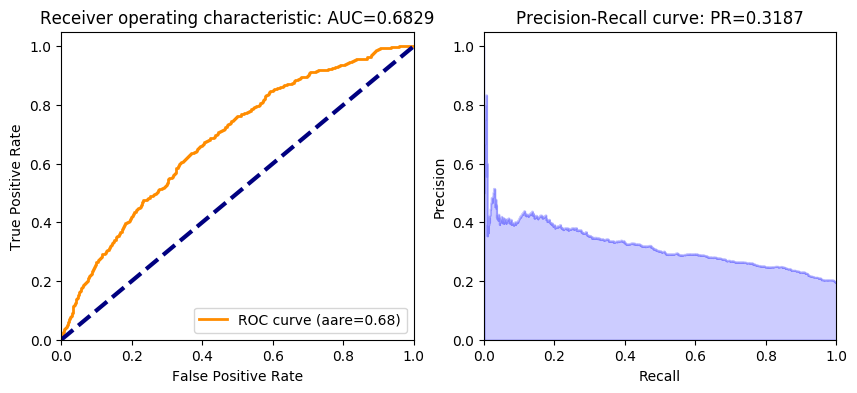

In [53]:
# generate the ROC and AUC curve
def ROC_AUC2(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

# plot ROC and AUC curve
ROC_AUC2(aml_v1,test_hex,'loan_default')

### 3.2 Whole dataset

In [54]:
# Use the previous hyperparameters to the whole dataset
aml_v2 = H2OAutoML(max_runtime_secs = 300, max_models=40, seed=1)
aml_v2.train(predictors,target,training_frame=train_w)

# Get the leaderboard
aml_v2.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20191124_195302,0.145948,0.382032,0.145948,0.291892,0.267989
StackedEnsemble_BestOfFamily_AutoML_20191124_195302,0.146366,0.382578,0.146366,0.2928,0.26834
XGBoost_1_AutoML_20191124_195302,0.146931,0.383316,0.146931,0.292091,0.270252
XGBoost_2_AutoML_20191124_195302,0.149173,0.386229,0.149173,0.29907,0.274107


In [55]:
# use test data to predict
pred2 = aml_v2.predict(test_w)
pred2.head()

# examine the performance of the leader model
perf2 = aml_v2.leader.model_performance(test_w)
perf2

stackedensemble prediction progress: |████████████████████████████████████| 100%

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.1466150786444031
RMSE: 0.3829034847639847
MAE: 0.29293774855108656
RMSLE: 0.2683780293746992
R^2: 0.06417749026596964
Mean Residual Deviance: 0.1466150786444031
Null degrees of freedom: 31999
Residual degrees of freedom: 31997
Null deviance: 5013.50399999967
Residual deviance: 4691.682516620899
AIC: 29381.83767302959


In [56]:
# generate the gains table
createGains(aml_v2)

stackedensemble prediction progress: |████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,123,197,320,123,197,0.20,0.08,60.0,2.05,12.0,38.44
1,320,90,230,640,213,427,0.36,0.16,120.0,1.78,20.0,33.28
2,320,88,232,960,301,659,0.50,0.25,180.0,1.67,25.0,31.35
3,320,66,254,1280,367,913,0.61,0.35,240.0,1.53,26.0,28.67
4,320,53,267,1600,420,1180,0.70,0.45,300.0,1.40,25.0,26.25
5,320,55,265,1920,475,1445,0.79,0.56,360.0,1.32,23.0,24.74
6,320,32,288,2240,507,1733,0.84,0.67,420.0,1.21,17.0,22.63
7,320,37,283,2560,544,2016,0.91,0.78,480.0,1.13,13.0,21.25
8,320,31,289,2880,575,2305,0.96,0.89,540.0,1.06,7.0,19.97


stackedensemble prediction progress: |████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



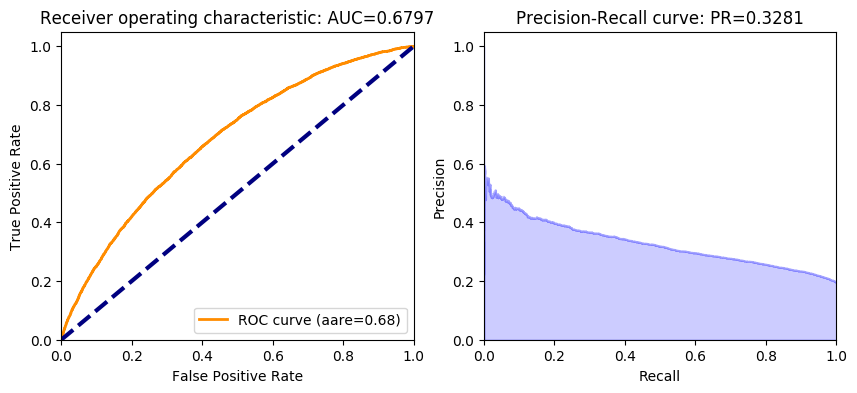

In [57]:
# generate the ROC&AUC curve
ROC_AUC2(aml_v2,test_w,'loan_default')

- Conclusion
    - Using AutoML with max_runtime_secs = 300, max_models=40, seed=1, the leader model will be StackedEnsemble_AllModels_AutoML_20191124_195302 and the result is quite good, which is much better than the sample code provided.
    - As we can see, the final version model have the largest lift number as 2.05, AUC value as 0.6797, and PR values as 0.3281.

### 3.3 Comparison between GLM and AutoML

- Conclusion:
    - Compare teh result of GLM and AutoML, I will chose GLM with lambda_ = 1e-5,alpha = 0.3 to be my final model since its gains table, ROC, and AUC curve look better than the other. Specifically, it has largest lift as 2.22, AUC equals to 0.693, and PR value as 0.3417. In other words, it has a better prediction ability.
    - We might concentrate more on the variables include AP004, AP003, TD013, TD005, MB005, CD117, MB007, and AP007 since they have a great power to increase the likelihood of load default. 
    - On the other hand, variable TD023, AP005, CD118, TD022, CD106, PA022 will decrease the load default probability. We might offer convenience for people who meet the requirement of these variables.